# 데이터셋 종류
- 추천알고리즘 성능비교를 위한 데이터셋
  1. MovieLens
  2. KMRD
  3. Netflix

- netflix 데이터 크기가 google colab 환경에서 진행하기에 적합하지 않기 때문에 `Part 4의 Chapter 01 딥러닝과 추천알고리즘` 은 kmrd 데이터셋 위주로 수업과 실습을 진행합니다. netflix 데이터 다운로드와 load하는 방법은 수업 영상과 아래 코드를 참고하시기 바랍니다.

In [1]:
import os
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
data_path = "C:/Users/user/Jupyter_project/fastcampus/data/"

## MovieLens
  - 미네소타 대학에서 개발된 영화 평점 데이터셋으로 추천 알고리즘 성능 평가를 위해 일반적으로 많이 사용된다
  - [imdb 영화 사이트](https://www.imdb.com)를 참고하는 경우도 있다
  - [데이터셋 다운로드 링크](https://grouplens.org/datasets/movielens/)
  - `ml-latest`, `ml-25m`, `ml-1m`, `ml-10m` 등 데이터셋 크기에 따라 종류가 다양하다
  - `ml-latest-small` 을 데이터셋으로 사용한다

In [5]:
path = data_path + "movielens"
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [7]:
def get_simple_df_info(df):
    print("dataframe 사이즈: ", df.shape)
    print("\n")
    print("dataframe 정보")
    print(df.info())
    print("\n")
    print("dataframe 간단 통계량")
    print(df.describe())
    print("\n")
    print("dataframe의 몇몇 데이터 샘플")
    print(df.head())

In [8]:
get_simple_df_info(df=tags_df)

dataframe 사이즈:  (3683, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


dataframe 간단 통계량
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09


dataframe의 몇몇 데이터 샘플
   userId  movieId              tag   timestamp
0       2    60756            funny  144

- 이전에 분석한 MovieLens 강의자료 참고

- 강의 자료 참고 github [링크](https://github.com/jaewonlee-728/fastcampus-RecSys/tree/master/01-Recommender-System-101)
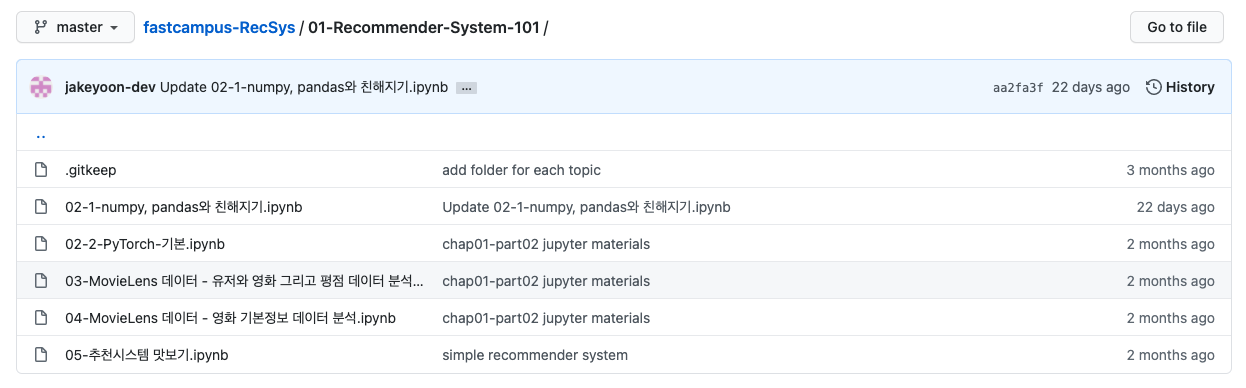


## KMRD
  - Korean Movie Recommender system Dataset
  - MovieLens 스타일로 네이버 영화 평점 사이트를 바탕으로 제작된 한국 데이터셋이다
  - [데이터셋 다운로드 링크](https://github.com/lovit/kmrd)

In [13]:
os.getcwd()

'C:\\Users\\user\\Jupyter_project\\fastcampus\\data'

In [12]:
os.chdir(data_path)

In [15]:
path = data_path + "kmrd"
%cd $path

if not os.path.exists(path):
  !git clone https://github.com/lovit/kmrd
  !python setup.py install
else:
    print("data and path already exists!")

C:\Users\user\Jupyter_project\fastcampus\data\kmrd


Cloning into 'kmrd'...


running install
running bdist_egg
running egg_info
creating kmr_dataset.egg-info
writing kmr_dataset.egg-info\PKG-INFO
writing dependency_links to kmr_dataset.egg-info\dependency_links.txt
writing requirements to kmr_dataset.egg-info\requires.txt
writing top-level names to kmr_dataset.egg-info\top_level.txt
writing manifest file 'kmr_dataset.egg-info\SOURCES.txt'
reading manifest file 'kmr_dataset.egg-info\SOURCES.txt'
writing manifest file 'kmr_dataset.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build
creating build\lib
creating build\lib\kmr_dataset
copying kmr_dataset\install.py -> build\lib\kmr_dataset
copying kmr_dataset\io.py -> build\lib\kmr_dataset
copying kmr_dataset\__init__.py -> build\lib\kmr_dataset
creating build\lib\kmr_dataset\datafile
creating build\lib\kmr_dataset\datafile\kmrd-small
copying kmr_dataset\datafile\kmrd-small\castings.csv -> build\lib\kmr_dataset\datafile\kmrd-small
copying kmr_

zip_safe flag not set; analyzing archive contents...
kmr_dataset.__pycache__.install.cpython-37: module references __file__
kmr_dataset.__pycache__.io.cpython-37: module references __file__


- 데이터셋 종류
  - 'small', '2m', '5m'
  - delimiter = '\t'

- `2m` 또는 `5m` 은 zip파일로 되어 있으므로 아래의 코드참고
- `kmr_dataset` 있는 directory 임을 확인해야한다

In [16]:
from kmr_dataset import load_rates
from kmr_dataset import get_paths

paths = get_paths(size='2m')
rates, timestamps = load_rates(size='2m')

Unzipped meta.zip
Unzipped rates-2m.zip
skip 44048 lines which are duplicated (user, item), #uniques=2570549


In [23]:
path = data_path + "kmrd/kmr_dataset/datafile/kmrd-small"
print(os.listdir(path))

['castings.csv', 'countries.csv', 'genres.csv', 'movies.txt', 'peoples.txt', 'rates.csv']


- 데이터 종류 및 설명

| 파일 이름 | column 이름 | separator | 
|---|---|---|
| castings.csv | movie id, people id, credit order, leading(주연배우 0 or 1) | comma(,) |
| countries.csv | movie id, 국가 이름 | comma(,) |
| genres.csv | movie id, genre | comma(,) |
| movies.txt | movie id, 한국제목, 영어제목, 개봉년도, 관람등급 | tab(\t) |
| peoples.txt | people id, 한국이름, 영어이름 | tab(\t) |
| rates.csv | user id, movie id, 평점(0 ~ 10), 시간 | comma(,) |


In [24]:
castings_df = pd.read_csv(os.path.join(path, 'castings.csv'), encoding='utf-8')
get_simple_df_info(castings_df)

dataframe 사이즈:  (9776, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB
None


dataframe 간단 통계량
              movie         people        order      leading
count   9776.000000    9776.000000  9776.000000  9776.000000
mean   10499.104746   36151.930851     9.799509     0.295315
std      287.023933   62989.430164    12.576221     0.456208
min    10001.000000       5.000000     1.000000     0.000000
25%    10260.000000    4327.000000     3.000000     0.000000
50%    10485.000000   14048.500000     6.000000     0.000000
75%    10754.250000   27978.000000    10.000000     1.000000
max    10999.000000  420466.000000   101.000000     1.000000


dataframe의 몇몇 데이터 샘플
 

In [25]:
countries_df = pd.read_csv(os.path.join(path, 'countries.csv'), encoding='utf-8')
get_simple_df_info(countries_df)

dataframe 사이즈:  (1109, 2)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    1109 non-null   int64 
 1   country  1109 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB
None


dataframe 간단 통계량
              movie
count   1109.000000
mean   10496.257890
std      285.409915
min    10001.000000
25%    10253.000000
50%    10492.000000
75%    10746.000000
max    10999.000000


dataframe의 몇몇 데이터 샘플
   movie country
0  10001    이탈리아
1  10001     프랑스
2  10002      미국
3  10003      미국
4  10004      미국


In [26]:
genres_df = pd.read_csv(os.path.join(path, 'genres.csv'), encoding='utf-8')
get_simple_df_info(genres_df)

dataframe 사이즈:  (2025, 2)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   movie   2025 non-null   int64 
 1   genre   2025 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.8+ KB
None


dataframe 간단 통계량
              movie
count   2025.000000
mean   10474.521975
std      289.972315
min    10001.000000
25%    10221.000000
50%    10474.000000
75%    10719.000000
max    10999.000000


dataframe의 몇몇 데이터 샘플
   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF
3  10002     코미디
4  10003      SF


In [27]:
movies_df = pd.read_csv(os.path.join(path, 'movies.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(movies_df)

dataframe 사이즈:  (999, 5)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      999 non-null    int64  
 1   title      992 non-null    object 
 2   title_eng  991 non-null    object 
 3   year       609 non-null    float64
 4   grade      957 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB
None


dataframe 간단 통계량
              movie         year
count    999.000000   609.000000
mean   10500.000000  1987.471264
std      288.530761    15.303710
min    10001.000000  1926.000000
25%    10250.500000  1982.000000
50%    10500.000000  1989.000000
75%    10749.500000  1991.000000
max    10999.000000  2020.000000


dataframe의 몇몇 데이터 샘플
   movie                 title                           title_eng    year  \
0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
1  10002     

In [28]:
peoples_df = pd.read_csv(os.path.join(path, 'peoples.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(peoples_df)

dataframe 사이즈:  (7172, 3)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   people    7172 non-null   int64 
 1   korean    7172 non-null   object
 2   original  6305 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.2+ KB
None


dataframe 간단 통계량
              people
count    7172.000000
mean    45828.791132
std     70461.756830
min         5.000000
25%      7157.000000
50%     15658.500000
75%     42337.000000
max    420466.000000


dataframe의 몇몇 데이터 샘플
   people    korean        original
0       5    아담 볼드윈    Adam Baldwin
1       8   애드리안 라인     Adrian Lyne
2       9     에이단 퀸     Aidan Quinn
3      13  구로사와 아키라  Akira Kurosawa
4      15     알 파치노       Al Pacino


In [29]:
rates_df = pd.read_csv(os.path.join(path, 'rates.csv'), encoding='utf-8')
get_simple_df_info(rates_df)

dataframe 사이즈:  (140710, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB
None


dataframe 간단 통계량
                user          movie           rate          time
count  140710.000000  140710.000000  140710.000000  1.407100e+05
mean    14948.679916   10278.818861       8.953258  1.297460e+09
std     14539.728057     292.806259       2.106047  1.374877e+08
min         0.000000   10001.000000       1.000000  1.069340e+09
25%      2980.000000   10048.000000       9.000000  1.180398e+09
50%      9292.000000   10148.000000      10.000000  1.271521e+09
75%     24129.000000   10489.000000      10.000000  1.409478e+09
max     52027.000000   10998.000000      10.00000

### genres 데이터 확인

In [30]:
genres_df.head()

,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [46]:
groups = genres_df.groupby('movie')
genres = [(list(set(x['movie'].values))[0], '/'.join(x['genre'].values)) for index, x in groups]
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

,genres
movie,
10001,드라마/멜로/로맨스
10002,SF/코미디
10003,SF/코미디
10004,서부/SF/판타지/코미디
10005,판타지/모험/SF/액션


In [47]:
movies_df = movies_df.set_index('movie')
movies_df.head()

,title,title_eng,year,grade
movie,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [48]:
movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres
movie,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션


### peoples 와 castings 데이터 확인

In [49]:
peoples_df.head()

,people,korean,original
0,5,아담 볼드윈,Adam Baldwin
1,8,애드리안 라인,Adrian Lyne
2,9,에이단 퀸,Aidan Quinn
3,13,구로사와 아키라,Akira Kurosawa
4,15,알 파치노,Al Pacino


In [50]:
castings_df.head()

,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [51]:
castings = [(list(set(x['movie'].values))[0], x['people'].values) for index, x in castings_df.groupby('movie')]
combined_castings_df = pd.DataFrame(data=castings, columns=['movie','people'])
combined_castings_df = combined_castings_df.set_index('movie')
combined_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


In [53]:
movies_df = pd.concat([movies_df, combined_castings_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people
movie,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]"


### countries 데이터 확인

In [54]:
countries_df.head()

,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [55]:
groups = countries_df.groupby('movie')
countries = [(list(set(x['movie'].values))[0], ','.join(x['country'].values)) for index, x in groups][:10]
combined_countries_df = pd.DataFrame(data=countries, columns=['movie', 'country'])
combined_countries_df = combined_countries_df.set_index('movie')
combined_countries_df.head()

,country
movie,
10001,"이탈리아,프랑스"
10002,미국
10003,미국
10004,미국
10005,미국


In [56]:
movies_df = pd.concat([movies_df, combined_countries_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people,country
movie,,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ...","이탈리아,프랑스"
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]",미국
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,...",미국
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1...",미국
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]",미국


### ratings 데이터 확인

In [57]:
print(rates_df.shape)
print(rates_df.head())

(140710, 4)
   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340


In [58]:
n_unique_users = len(rates_df['user'].unique())
print(n_unique_users)

52028


In [59]:
n_unique_movies = len(rates_df['movie'].unique())
print(n_unique_movies)

600


In [60]:
print('평점의 평균: ', rates_df['rate'].mean())
print('평점의 표준편차: ', rates_df['rate'].std())

평점의 평균:  8.953258474877407
평점의 표준편차:  2.1060471738510547


In [61]:
# nan 값이 있는지 확인한다
rates_df.isnull().sum()

user     0
movie    0
rate     0
time     0
dtype: int64

array([[<AxesSubplot:title={'center':'user'}>,
        <AxesSubplot:title={'center':'movie'}>],
       [<AxesSubplot:title={'center':'rate'}>, <AxesSubplot:>]],
      dtype=object)

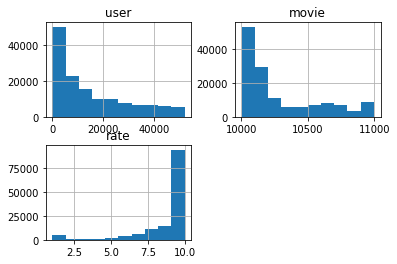

In [62]:
rates_df[['user','movie','rate']].hist()

In [63]:
rates_df.groupby(['user', 'rate']).size()

user   rate
0      3        1
       4        2
       5        1
       6       14
       7       29
               ..
52023  10       1
52024  10       1
52025  7        1
52026  9        1
52027  10       1
Length: 67575, dtype: int64

In [64]:
rates_df.groupby(['user']).mean()

,movie,rate,time
user,,,
0,10330.588235,7.388235,1.447577e+09
1,10107.000000,9.000000,1.408888e+09
2,10198.866667,7.733333,1.321878e+09
3,10320.923913,7.413043,1.396393e+09
4,10364.323944,6.760563,1.464992e+09
...,...,...,...
52023,10998.000000,10.000000,1.421680e+09
52024,10998.000000,10.000000,1.204622e+09
52025,10998.000000,7.000000,1.498547e+09


In [65]:
rates_df.groupby('user')['movie'].count()

user
0        85
1         1
2        15
3        92
4        71
         ..
52023     1
52024     1
52025     1
52026     1
52027     1
Name: movie, Length: 52028, dtype: int64

#### user가 평점을 준 영화 수 & 평균 평점

In [66]:
stats_df = pd.DataFrame({
    'movie_count': rates_df.groupby('user')['movie'].count(),
    'rating_avg': rates_df.groupby('user')['rate'].mean(), 
'rating_std': rates_df.groupby('user')['rate'].std()})

print(stats_df.shape)
print(stats_df.head())

(52028, 3)
      movie_count  rating_avg  rating_std
user                                     
0              85    7.388235    1.337144
1               1    9.000000         NaN
2              15    7.733333    1.869556
3              92    7.413043    1.638494
4              71    6.760563    2.338893


#### rate가 많은 영화 (사람들이 평점을 준 횟수가 많은 영화)

In [67]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': rates_df.groupby('movie')['user'].count(),
    'avg_ratings': rates_df.groupby('movie')['rate'].mean(),
    'std_ratings': rates_df.groupby('movie')['rate'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(600, 4)
   movie  num_users_watch  avg_ratings  std_ratings
0  10001             3635     9.294360     2.032011
1  10002             3004     9.416778     1.740604
2  10003              989     9.270981     1.741194
3  10004              700     9.120000     1.688944
4  10005              905     9.048619     1.935881
5  10006              747     9.115127     2.004051
6  10007              699     9.034335     1.886909
7  10008              242     8.805785     2.108934
8  10009              119     8.462185     2.053480
9  10011               76     5.250000     3.128898


In [68]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movie,num_users_watch,avg_ratings,std_ratings
164,10200,7265,9.434136,1.945808
44,10048,7016,9.378706,1.853923
83,10102,4391,9.401503,2.013120
14,10016,4029,9.399851,1.863305
570,10936,3690,9.250949,1.990736
...,...,...,...,...
571,10937,1,10.000000,NaN
358,10510,1,10.000000,NaN
506,10799,1,10.000000,NaN
511,10811,1,7.000000,NaN


<AxesSubplot:>

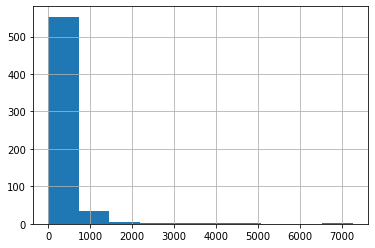

In [69]:
movieid_user_df['num_users_watch'].hist()

#### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [70]:
# 평점을 많이 받은 영화 
ratings_count_df = rates_df.groupby('movie')['user'].count()
ratings_count_df.head()

movie
10001    3635
10002    3004
10003     989
10004     700
10005     905
Name: user, dtype: int64

In [73]:
movies_df.head()

,title,title_eng,year,grade,genres,people,country
movie,,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ...","이탈리아,프랑스"
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]",미국
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,...",미국
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1...",미국
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]",미국


In [75]:
df = pd.DataFrame({
    'ratings_count': rates_df.groupby('movie')['user'].count(),
})
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [76]:
df.head()

,ratings_count,movie_name
movie,,
10001,3635,시네마 천국
10002,3004,빽 투 더 퓨쳐
10003,989,빽 투 더 퓨쳐 2
10004,700,빽 투 더 퓨쳐 3
10005,905,스타워즈 에피소드 4 - 새로운 희망


In [77]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movie,,
10200,7265,터미네이터 2:오리지널
10048,7016,죽은 시인의 사회
10102,4391,사운드 오브 뮤직
10016,4029,나 홀로 집에
10936,3690,가위손
...,...,...
10937,1,위기의 여자
10510,1,성춘향전
10799,1,내 친구 제제


#### 특정영화의 평점분포

<AxesSubplot:>

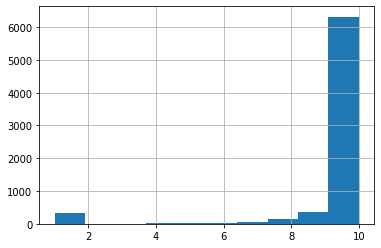

In [78]:
rates_df[rates_df.movie == 10200]['rate'].hist()

<AxesSubplot:>

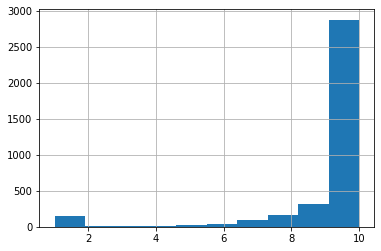

In [79]:
rates_df[rates_df.movie == 10936]['rate'].hist()

## Netflix
  - Netflix Prize 대회에서 추천알고리즘 성능 평가를 위해 사용된 데이터셋이다
  - [데이터셋 다운로드 링크](https://archive.org/details/nf_prize_dataset.tar)
  - [Kaggle 사이트](https://www.kaggle.com/netflix-inc/netflix-prize-data)
  - 데이터를 다운로드받고, README 파일 꼭 읽어보기! 

In [ ]:
print(os.curdir)
path = data_path + 'netflix'
print(path)

### Training Dataset
- `training_set.tar`를 압축해제하면 총 17770개 파일이 있다
- 영화별로 하나의 파일이 존재하고, 첫번째 줄은 movie id를 의미한다
- 아래와 같은 형식으로 파일이 구성되어 있다
  ```
  CustomerID,Rating,Date

  - MovieIDs range from 1 to 17770 sequentially.
  - CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
  - Ratings are on a five star (integral) scale from 1 to 5.
  - Dates have the format YYYY-MM-DD.
  ```
- 다음과 같이 파일로 되어 있음을 알 수 있다
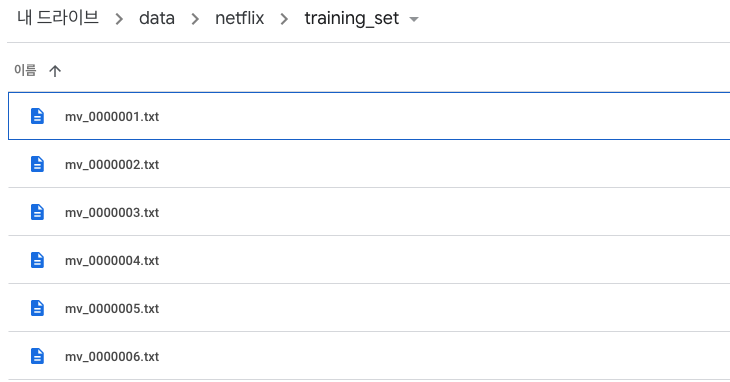

In [ ]:
training_set_path = os.path.join(path, 'training_set')
print(training_set_path)
training_files = os.listdir(training_set_path)

In [ ]:
len(training_files)

In [ ]:
training_files[:10]

In [ ]:
def read_trainfile(filename):
  movieid = int(filename.split('.txt')[0].split('_')[1])
  data_list = []
  with open(os.path.join(training_set_path, filename), 'r') as f:
    for line in f.readlines():
      if ':' in line:
        continue
      else:
        # CustomerID,Rating,Date
        cid = line.split(',')[0]
        rate = line.split(',')[1]
        date = line.split(',')[2].replace('\n', '')
        each_data = (movieid, cid, rate, date)
        data_list.append(each_data)

  df = pd.DataFrame(data = data_list, columns =['movieid','customerID','rating','date'])
  return df

In [ ]:
from tqdm import tqdm
train_df = pd.DataFrame()
for filename in tqdm(training_files[:10]):
  df = read_trainfile(filename)
  if df.shape[1] == 4:
    train_df = pd.concat([train_df, df], axis=0)

In [ ]:
print(train_df.shape)

In [ ]:
train_df.head()

In [ ]:
train_df.groupby('movieid').count()

### Movies File(Titles) 

- encoding값이 `ISO-8859-1`임을 확인한다

In [ ]:
df_title = pd.read_csv(os.path.join(path, 'movie_titles.txt'), encoding = "ISO-8859-1", header = None, names = ['movieid', 'year', 'title'])
df_title.head()

### 기타 파일
1. qualifying.txt
  - 특정 movie id에 평점을 매긴 customerid와 날짜를 적어둔 파일이다
  - qualifying 데이터셋으로 모델의 평점 예측을 기록한다
  ```
  MovieID1:
  CustomerID11,Date11
  CustomerID12,Date12
  ...
  MovieID2:
  CustomerID21,Date21
  CustomerID22,Date22
  ```

2. probe.txt
  - qualifying 데이터셋으로 최종 예측결과를 제출하기 전, 사용해볼 수 있는 테스트 파일이다
  ```
  MovieID1:
  CustomerID11
  CustomerID12
  ...
  MovieID2:
  CustomerID21
  CustomerID22
  ```